# **Credit Score Classification**

### **Importing the Required Libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### **The Purpose of the Project**

This project focuses on credit classification. The main objective is to develop a predictive model to categorize credit applicants into different risk levels. By analyzing various features and historical data of applicants, the model aims to assist financial institutions in evaluating credit applications more effectively. The classification goal is to categorize credit scores into three main groups: Standard, Poor, and Good. The project aims to improve the efficiency and accuracy of the credit approval process, reduce default risks, and optimize the overall credit management strategy.

### **Column Descriptions**

**ID**: Unique identifier for each record in the dataset.

**Customer_ID**: Unique identifier for each customer.

**Month**: Month of the data record.

**Name**: Customer's name.

**Age**: Age of the customer.

**SSN**: Social Security Number or a unique identification number.

**Occupation**: Customer's occupation or job title.

**Annual_Income**: Annual income of the customer.

**Monthly_Inhand_Salary**: Net monthly income available to the customer.

**Num_Bank_Accounts**: Number of bank accounts the customer holds.

**Num_Credit_Card**: Number of credit cards owned by the customer.

**Interest_Rate**: Interest rate associated with financial transactions.

**Num_of_Loan**: Number of loans the customer has.

**Type_of_Loan**: Type or category of the loan.

**Delay_from_due_date**: Delay in payment from the due date.

**Num_of_Delayed_Payment**: Number of delayed payments.

**Changed_Credit_Limit**: Any recent changes in the customer's credit limit.

**Num_Credit_Inquiries**: Number of credit inquiries made by the customer.

**Credit_Mix**: Variety of credit types in the customer's financial profile.

**Outstanding_Debt**: Total outstanding debt of the customer.

**Credit_Utilization_Ratio**: Ratio of credit used to credit available.

**Credit_History_Age**: Age of the customer's credit history.

**Payment_of_Min_Amount**: Payment behavior regarding the minimum amount due.

**Total_EMI_per_month**: Total Equated Monthly Installments paid by the customer.

**Amount_invested_monthly**: Amount invested by the customer monthly.

**Payment_Behaviour**: General behavior regarding payments.

**Monthly_Balance**: Monthly balance in the customer's financial accounts.

**Credit_Score**: Numerical representation of the customer's creditworthiness.

### **Examining the dataset**

Import the relevant libraries with their abbreviations. Read the dataset into a DataFrame named 'df.' Examine the first 5 rows of the DataFrame (known as 'head'). Examine the last 5 rows of the DataFrame (known as 'tail'). Inspect randomly selected rows of the DataFrame (known as 'sample'). Explore the 'columns' attribute of the DataFrame.

In [2]:
data_frame = pd.read_csv("train.csv")
data_frame

<ipython-input-2-beeb62d0767f>:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  data_frame = pd.read_csv("train.csv")


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0x25fe9,CUS_0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.866228,Poor
99996,0x25fea,CUS_0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.65161,Poor
99997,0x25feb,CUS_0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.809083,Poor
99998,0x25fec,CUS_0x942c,July,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.67258219721603,Low_spent_Large_value_payments,319.164979,Standard


In [3]:
data_frame.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [4]:
data_frame.tail()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
99995,0x25fe9,CUS_0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.866228,Poor
99996,0x25fea,CUS_0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.65161,Poor
99997,0x25feb,CUS_0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.809083,Poor
99998,0x25fec,CUS_0x942c,July,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.67258219721603,Low_spent_Large_value_payments,319.164979,Standard
99999,0x25fed,CUS_0x942c,August,Nicks,25,078-73-5990,Mechanic,39628.99_,3359.415833,4,...,Good,502.38,34.192463,31 Years and 10 Months,No,35.104023,167.1638651610451,!@9#%8,393.673696,Poor


In [5]:
data_frame.sample(5)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
37256,0xf04e,CUS_0x4ddf,January,Malonep,30,004-98-8424,Lawyer,40984.4,3655.366667,3,...,_,292.09,33.273625,21 Years and 5 Months,No,56.966458,234.73271233465047,Low_spent_Small_value_payments,363.83749587678767,Poor
16715,0x77f1,CUS_0x5e6b,April,Frank Jackz,46,278-23-1336,Scientist,72904.16,6341.346667,4,...,Standard,748.11,37.193608,18 Years and 8 Months,No,67.760350,205.50721837679075,High_spent_Medium_value_payments,610.867098690876,Standard
53127,0x14d49,CUS_0x9bd9,August,Barretom,41,218-24-8466,Architect,106122.03,8652.502500,3,...,Good,1144.03,29.102520,NaN,NM,78.776895,273.7234254307687,!@9#%8,762.749929094145,Good
55933,0x15dbb,CUS_0xb1d2,June,Forgionen,42,657-59-2344,Scientist,61737.94,4888.828333,5,...,_,161.0,39.348139,30 Years and 2 Months,No,111.637277,NaN,High_spent_Medium_value_payments,565.4848363581822,Standard
70129,0x1b0eb,CUS_0x795c,February,Jonathann,26,891-13-2675,_______,18670.22,1301.851667,9,...,_,4748.43,38.417721,0 Years and 3 Months,Yes,101.620613,119.565514423268,Low_spent_Large_value_payments,178.99903901967426,Poor


In [6]:
data_frame.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

### **Understanding Variables**

##### **After knowing all the variables in the dataset, retrieve basic information from the DataFrame.**

Print the shape, length, dimensions, and index of the DataFrame. Find the number of unique values in each column (known as 'nunique'). Display all columns and their data types (known as 'info'). Obtain some basic descriptive statistics for all numerical columns (known as 'describe'). Obtain some basic descriptive statistics for all categorical columns (known as 'describe'). Check for missing values. Check for duplicated values.

In [7]:
data_frame.shape

(100000, 28)

In [8]:
len(data_frame)

100000

In [9]:
data_frame.size

2800000

In [10]:
data_frame.index

RangeIndex(start=0, stop=100000, step=1)

In [11]:
data_frame.nunique()

,0
ID,100000
Customer_ID,12500
Month,8
Name,10139
Age,1788
SSN,12501
Occupation,16
Annual_Income,18940
Monthly_Inhand_Salary,13235
Num_Bank_Accounts,943


In [12]:
data_frame.info

<bound method DataFrame.info of             ID Customer_ID     Month           Name   Age          SSN  \
0       0x1602   CUS_0xd40   January  Aaron Maashoh    23  821-00-0265   
1       0x1603   CUS_0xd40  February  Aaron Maashoh    23  821-00-0265   
2       0x1604   CUS_0xd40     March  Aaron Maashoh  -500  821-00-0265   
3       0x1605   CUS_0xd40     April  Aaron Maashoh    23  821-00-0265   
4       0x1606   CUS_0xd40       May  Aaron Maashoh    23  821-00-0265   
...        ...         ...       ...            ...   ...          ...   
99995  0x25fe9  CUS_0x942c     April          Nicks    25  078-73-5990   
99996  0x25fea  CUS_0x942c       May          Nicks    25  078-73-5990   
99997  0x25feb  CUS_0x942c      June          Nicks    25  078-73-5990   
99998  0x25fec  CUS_0x942c      July          Nicks    25  078-73-5990   
99999  0x25fed  CUS_0x942c    August          Nicks    25  078-73-5990   

      Occupation Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  ...  \
0      Scientist      19114.12            1824.843333                  3  ...   
1      Scientist      19114.12                    NaN                  3  ...   
2      Scientist      19114.12                    NaN                  3  ...   
3      Scientist      19114.12                    NaN                  3  ...   
4      Scientist      19114.12            1824.843333                  3  ...   
...          ...           ...                    ...                ...  ...   
99995   Mechanic      39628.99            3359.415833                  4  ...   
99996   Mechanic      39628.99            3359.415833                  4  ...   
99997   Mechanic      39628.99            3359.415833                  4  ...   
99998   Mechanic      39628.99            3359.415833                  4  ...   
99999   Mechanic     39628.99_            3359.415833                  4  ...   

       Credit_Mix  Outstanding_Debt Credit_Utilization_Ratio  \
0               _            809.98                26.822620   
1            Good            809.98                31.944960   
2            Good            809.98                28.609352   
3            Good            809.98                31.377862   
4            Good            809.98                24.797347   
...           ...               ...                      ...   
99995           _            502.38                34.663572   
99996           _            502.38                40.565631   
99997        Good            502.38                41.255522   
99998        Good            502.38                33.638208   
99999        Good            502.38                34.192463   

           Credit_History_Age  Payment_of_Min_Amount Total_EMI_per_month  \
0       22 Years and 1 Months                     No           49.574949   
1                         NaN                     No           49.574949   
2       22 Years and 3 Months                     No           49.574949   
3       22 Years and 4 Months                     No           49.574949   
4       22 Years and 5 Months                     No           49.574949   
...                       ...                    ...                 ...   
99995   31 Years and 6 Months                     No           35.104023   
99996   31 Years and 7 Months                     No           35.104023   
99997   31 Years and 8 Months                     No           35.104023   
99998   31 Years and 9 Months                     No           35.104023   
99999  31 Years and 10 Months                     No           35.104023   

      Amount_invested_monthly                 Payment_Behaviour  \
0           80.41529543900253   High_spent_Small_value_payments   
1          118.28022162236736    Low_spent_Large_value_payments   
2             81.699521264648   Low_spent_Medium_value_payments   
3           199.4580743910713    Low_spent_Small_value_payments   
4          41.420153086217326  High_spent_Medium_value_payments   
...                   

In [13]:
dtypes = pd.DataFrame(data_frame.dtypes, columns = ['dtypes'])
dtypes

,dtypes
ID,object
Customer_ID,object
Month,object
Name,object
Age,object
SSN,object
Occupation,object
Annual_Income,object
Monthly_Inhand_Salary,float64
Num_Bank_Accounts,int64


In [14]:
data_frame.describe()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,98035.000000,100000.000000,100000.000000
mean,4194.170850,17.091280,22.47443,72.466040,21.068780,27.754251,32.285173,1403.118217
std,3183.686167,117.404834,129.05741,466.422621,14.860104,193.177339,5.116875,8306.041270
min,303.645417,-1.000000,0.00000,1.000000,-5.000000,0.000000,20.000000,0.000000
25%,1625.568229,3.000000,4.00000,8.000000,10.000000,3.000000,28.052567,30.306660
50%,3093.745000,6.000000,5.00000,13.000000,18.000000,6.000000,32.305784,69.249473
75%,5957.448333,7.000000,7.00000,20.000000,28.000000,9.000000,36.496663,161.224249
max,15204.633333,1798.000000,1499.00000,5797.000000,67.000000,2597.000000,50.000000,82331.000000


In [15]:
data_frame.describe(include='object').T

,count,unique,top,freq
ID,100000,100000,0x1602,1
Customer_ID,100000,12500,CUS_0xd40,8
Month,100000,8,January,12500
Name,90015,10139,Langep,44
Age,100000,1788,38,2833
SSN,100000,12501,#F%$D@*&8,5572
Occupation,100000,16,_______,7062
Annual_Income,100000,18940,36585.12,16
Num_of_Loan,100000,434,3,14386
Type_of_Loan,88592,6260,Not Specified,1408


In [16]:
data_frame.isnull().sum()

,0
ID,0
Customer_ID,0
Month,0
Name,9985
Age,0
SSN,0
Occupation,0
Annual_Income,0
Monthly_Inhand_Salary,15002
Num_Bank_Accounts,0


In [17]:
data_frame.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

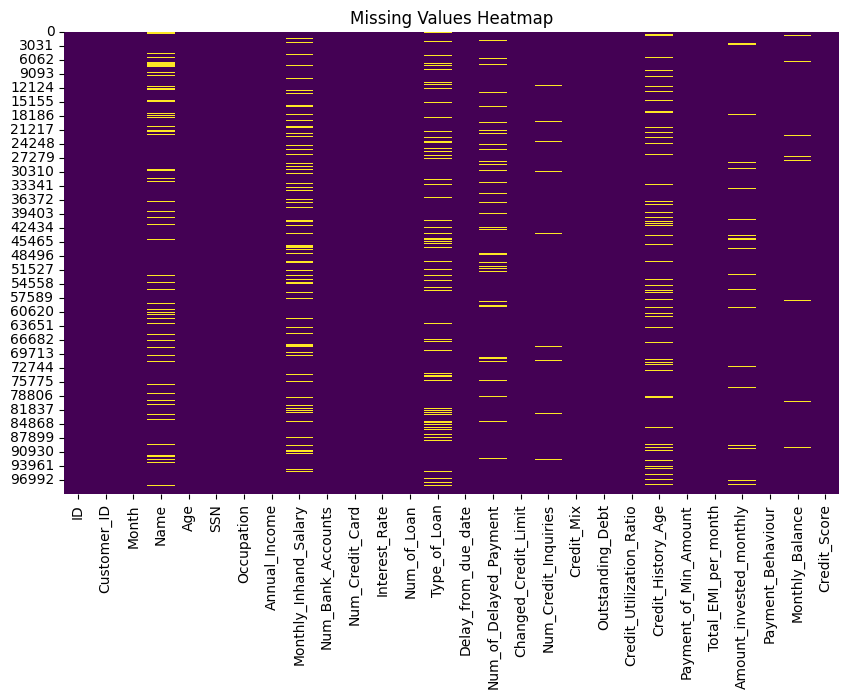

In [18]:
plt.figure(figsize=(10, 6))
sns.heatmap(data_frame.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

This code is used to visualize missing values in a DataFrame using the seaborn and matplotlib library. A distribution plot is created for each column in the DataFrame, showing the distribution of missing values. According to this plot, there are missing values in the following columns: Name, Monthly_Inhand_Salary, Type_of_Loan, Num_of_Delayed_Payment, Num_Credit_Inquiries, Credit_History_Age, Amount_invested_monthly, and Monthly_Balance.

### **Preparing the Dataset**

I will use the following code to organize the data related to columns.

In [19]:
data_frame = data_frame.drop(columns= ["ID", "Customer_ID", "Month", "Name", "SSN"])

In [20]:
data_frame = data_frame.apply(lambda x: x.str.replace('_', '') if x.dtype == 'object' else x)

In [21]:
data_frame.replace('', pd.NA, inplace=True)

In [22]:
data_frame.fillna(data_frame.mode().iloc[0], inplace=True)

In [23]:
columns=data_frame[["Monthly_Inhand_Salary","Num_Bank_Accounts","Num_Credit_Card","Interest_Rate","Delay_from_due_date","Num_Credit_Inquiries","Credit_Utilization_Ratio","Total_EMI_per_month"]]

In [24]:
data_frame.duplicated().value_counts()

,count
False,100000


In [25]:
data_frame[["Annual_Income", "Num_of_Loan", "Num_of_Delayed_Payment", "Changed_Credit_Limit", "Outstanding_Debt"]] = data_frame[["Annual_Income", "Num_of_Loan", "Num_of_Delayed_Payment", "Changed_Credit_Limit", "Outstanding_Debt"]].astype(float)

In [26]:
data_frame[["Age","Amount_invested_monthly", "Monthly_Balance"]] = data_frame[["Age","Amount_invested_monthly", "Monthly_Balance"]].astype(float)

In [27]:
data_frame.dtypes

,0
Age,float64
Occupation,object
Annual_Income,float64
Monthly_Inhand_Salary,float64
Num_Bank_Accounts,int64
Num_Credit_Card,int64
Interest_Rate,int64
Num_of_Loan,float64
Type_of_Loan,object
Delay_from_due_date,int64


In [28]:
data_frame['New_Occupation'] = data_frame['Occupation']

In [29]:
data_frame

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,...,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,New_Occupation
0,23.0,Scientist,19114.12,1824.843333,3,4,3,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,...,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.415295,HighspentSmallvaluepayments,3.124941e+02,Good,Scientist
1,23.0,Scientist,19114.12,2295.058333,3,4,3,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,...,809.98,31.944960,15 Years and 11 Months,No,49.574949,118.280222,LowspentLargevaluepayments,2.846292e+02,Good,Scientist
2,-500.0,Scientist,19114.12,2295.058333,3,4,3,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,...,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521,LowspentMediumvaluepayments,3.312099e+02,Good,Scientist
3,23.0,Scientist,19114.12,2295.058333,3,4,3,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,...,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.458074,LowspentSmallvaluepayments,2.234513e+02,Good,Scientist
4,23.0,Scientist,19114.12,1824.843333,3,4,3,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,...,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153,HighspentMediumvaluepayments,3.414892e+02,Good,Scientist
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,25.0,Mechanic,39628.99,3359.415833,4,6,7,2.0,"Auto Loan, and Student Loan",23,...,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.971333,HighspentLargevaluepayments,-3.333333e+26,Poor,Mechanic
99996,25.0,Mechanic,39628.99,3359.415833,4,6,7,2.0,"Auto Loan, and Student Loan",18,...,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.185950,HighspentMediumvaluepayments,-3.333333e+26,Poor,Mechanic
99997,25.0,Mechanic,39628.99,3359.415833,4,6,5729,2.0,"Auto Loan, and Student Loan",27,...,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.028477,HighspentLargevaluepayments,-3.333333e+26,Poor,Mechanic
99998,25.0,Mechanic,39628.99,3359.415833,4,6,7,2.0,"Auto Loan, and Student Loan",20,...,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.672582,LowspentLargevaluepayments,-3.333333e+26,Standard,Mechanic


In [30]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

data_frame['Occupation'] = label_encoder.fit_transform(data_frame['Occupation'])
data_frame['Type_of_Loan'] = label_encoder.fit_transform(data_frame['Type_of_Loan'])
data_frame['Credit_Mix'] = label_encoder.fit_transform(data_frame['Credit_Mix'])
data_frame['Credit_History_Age'] = label_encoder.fit_transform(data_frame['Credit_History_Age'])
data_frame['Payment_of_Min_Amount'] = label_encoder.fit_transform(data_frame['Payment_of_Min_Amount'])
data_frame['Payment_Behaviour'] = label_encoder.fit_transform(data_frame['Payment_Behaviour'])

In [31]:
data_frame.dtypes

,0
Age,float64
Occupation,int64
Annual_Income,float64
Monthly_Inhand_Salary,float64
Num_Bank_Accounts,int64
Num_Credit_Card,int64
Interest_Rate,int64
Num_of_Loan,float64
Type_of_Loan,int64
Delay_from_due_date,int64


In [32]:
non_numeric_columns = data_frame.select_dtypes(exclude=['number']).columns

data_set_numeric = data_frame.drop(columns=non_numeric_columns)

Q1 = data_set_numeric.quantile(0.25)
Q3 = data_set_numeric.quantile(0.75)
IQR = Q3 - Q1

Outliers = ((data_set_numeric < (Q1 - 1.5 * IQR)) | (data_set_numeric > (Q3 + 1.5 * IQR))).any(axis=1)
Outliers

Refined_Data_Set = data_frame[~Outliers]

Refined_Data_Set

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,...,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,New_Occupation
0,23.0,12,19114.12,1824.843333,3,4,3,4.0,128,3,...,809.98,26.822620,180,1,49.574949,80.415295,3,312.494089,Good,Scientist
1,23.0,12,19114.12,2295.058333,3,4,3,4.0,128,-1,...,809.98,31.944960,86,1,49.574949,118.280222,4,284.629162,Good,Scientist
3,23.0,12,19114.12,2295.058333,3,4,3,4.0,128,5,...,809.98,31.377862,185,1,49.574949,199.458074,6,223.451310,Good,Scientist
4,23.0,12,19114.12,1824.843333,3,4,3,4.0,128,6,...,809.98,24.797347,186,1,49.574949,41.420153,2,341.489231,Good,Scientist
5,23.0,12,19114.12,2295.058333,3,4,3,4.0,128,8,...,809.98,27.262259,187,1,49.574949,62.430172,0,340.479212,Good,Scientist
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98289,29.0,5,34599.94,2942.328333,7,6,3,0.0,3463,19,...,942.59,40.788342,237,1,0.000000,79.228156,3,475.004677,Standard,Entrepreneur
98295,29.0,5,34599.94,2942.328333,7,6,3,0.0,3463,22,...,942.59,33.128609,243,1,0.000000,165.397552,3,388.835282,Standard,Entrepreneur
98297,38.0,7,41015.55,2295.058333,0,4,4,1.0,4144,4,...,599.40,38.442034,86,1,25.671257,218.360354,3,331.264639,Standard,Lawyer
98299,38.0,7,41015.55,3152.962500,0,4,4,1.0,4144,9,...,599.40,31.936092,219,0,25.671257,387.541439,6,192.083554,Standard,Lawyer


In [33]:
def first_look(col):
    print('column name : ', col)
    print('--------------------------------')
    print('Per_of_Nulls   : ', '%', round(Refined_Data_Set[col].isnull().sum() / Refined_Data_Set.shape[0]*100, 2))
    print('Num_of_Nulls   : ', Refined_Data_Set[col].isnull().sum())
    print('Num_of_Uniques : ', Refined_Data_Set[col].nunique())
    print('Duplicates     : ', Refined_Data_Set.duplicated(subset = None, keep = 'first').sum())
    print(Refined_Data_Set[col].value_counts(dropna = False).sort_index())

Examine how to separate the data frame into numerical and categorical columns

In [34]:
numerical= Refined_Data_Set.select_dtypes('number').columns

categorical = Refined_Data_Set.select_dtypes('object').columns

print('---------------------')
print(f'Numerical Columns:  {Refined_Data_Set[numerical].columns}')
print('---------------------')
print(f'Categorical Columns: {Refined_Data_Set[categorical].columns}')
print('---------------------')

---------------------
Numerical Columns:  Index(['Age', 'Occupation', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Type_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment',
       'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Credit_Mix',
       'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance'],
      dtype='object')
---------------------
Categorical Columns: Index(['Credit_Score', 'New_Occupation'], dtype='object')
---------------------


**Numeric Column**

In [35]:
numerical

Index(['Age', 'Occupation', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Type_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment',
       'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Credit_Mix',
       'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance'],
      dtype='object')

**Categorical Column**

In [36]:
categorical

Index(['Credit_Score', 'New_Occupation'], dtype='object')

**Now, examine each column individually and make the necessary corrections.**

In [37]:
Refined_Data_Set.describe(include = 'all')

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,...,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,New_Occupation
count,56024.000000,56024.000000,56024.000000,56024.000000,56024.000000,56024.000000,56024.000000,56024.000000,56024.000000,56024.000000,...,56024.000000,56024.000000,56024.000000,56024.000000,56024.000000,56024.000000,56024.000000,56024.000000,56024,56024
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,15
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Lawyer
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30543,7699
mean,33.361845,6.963301,39756.227195,3155.872525,5.321327,5.444435,14.192935,3.396616,3197.486220,19.420409,...,1258.731598,32.020386,184.289001,1.410288,81.092963,157.482343,3.570113,363.903691,NaN,NaN
std,10.847857,4.147290,26397.726209,2055.871749,2.507179,2.002145,8.457900,2.273411,1727.302186,12.638423,...,905.144828,4.987493,107.881935,0.692924,76.528626,127.974004,2.014666,135.689820,NaN,NaN
min,14.000000,0.000000,7005.930000,303.645417,-1.000000,0.000000,1.000000,0.000000,0.000000,-5.000000,...,0.230000,21.027665,0.000000,0.000000,0.000000,0.000000,0.000000,0.095482,NaN,NaN
25%,24.000000,4.000000,18409.790000,1669.073333,3.000000,4.000000,7.000000,2.000000,1757.000000,10.000000,...,550.520000,27.837422,87.000000,1.000000,25.826041,67.147945,2.000000,272.824541,NaN,NaN
50%,33.000000,7.000000,32808.090000,2300.368333,5.000000,5.000000,13.000000,3.000000,3463.000000,17.000000,...,1125.160000,32.023903,160.000000,2.000000,56.402590,117.033653,4.000000,332.053790,NaN,NaN
75%,42.000000,10.000000,57575.040000,4134.022500,7.000000,7.000000,19.000000,5.000000,4622.000000,27.000000,...,1717.150000,36.215594,267.000000,2.000000,113.900936,202.885346,6.000000,432.793210,NaN,NaN


In [38]:
bins = [10, 20, 30, 40, 50, 60]
labels = ['10-19','20-29', '30-39', '40-49', '50-59']
Refined_Data_Set['Age_Group'] = pd.cut(Refined_Data_Set['Age'], bins=bins, labels=labels)
print(Refined_Data_Set)

        Age  Occupation  Annual_Income  Monthly_Inhand_Salary  \
0      23.0          12       19114.12            1824.843333   
1      23.0          12       19114.12            2295.058333   
3      23.0          12       19114.12            2295.058333   
4      23.0          12       19114.12            1824.843333   
5      23.0          12       19114.12            2295.058333   
...     ...         ...            ...                    ...   
98289  29.0           5       34599.94            2942.328333   
98295  29.0           5       34599.94            2942.328333   
98297  38.0           7       41015.55            2295.058333   
98299  38.0           7       41015.55            3152.962500   
98301  38.0           7       41015.55            3152.962500   

       Num_Bank_Accounts  Num_Credit_Card  Interest_Rate  Num_of_Loan  \
0                      3                4              3          4.0   
1                      3                4              3          4.0   


<ipython-input-38-6bf6c17dae64>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Refined_Data_Set['Age_Group'] = pd.cut(Refined_Data_Set['Age'], bins=bins, labels=labels)


<ipython-input-39-4d80fe114d89>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Age_Group', data=Refined_Data_Set, palette='rainbow', order=Refined_Data_Set['Age_Group'].value_counts().index)


Text(0.5, 1.0, 'Age Counts')

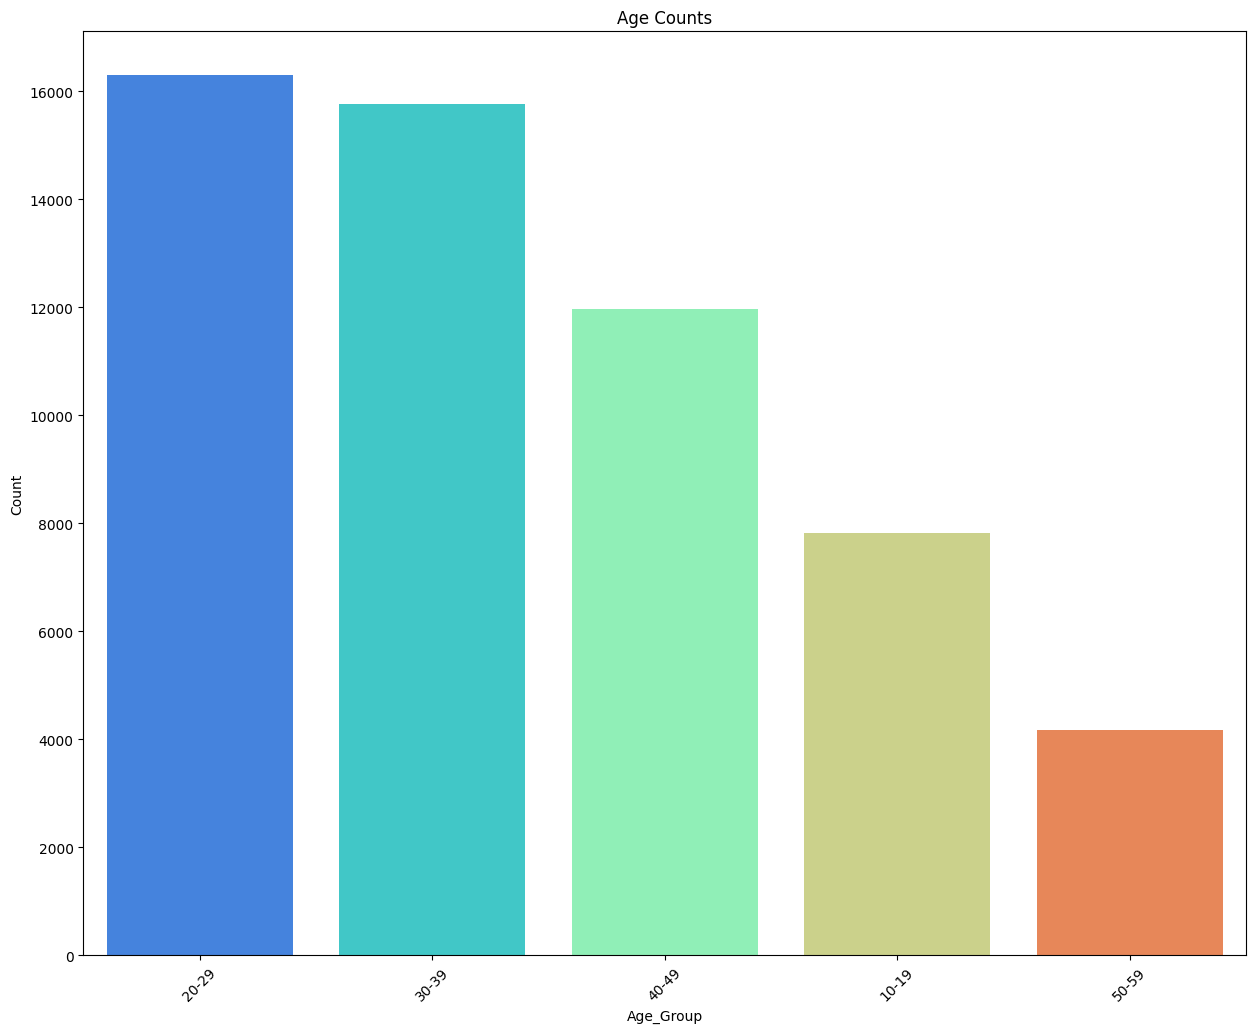

In [39]:
plt.figure(figsize=(15, 12))
sns.countplot(x='Age_Group', data=Refined_Data_Set, palette='rainbow', order=Refined_Data_Set['Age_Group'].value_counts().index)
plt.xticks(rotation=45)
plt.xlabel('Age_Group')
plt.ylabel('Count')
plt.title('Age Counts')

In [40]:
Refined_Data_Set.groupby("Age_Group")["Monthly_Inhand_Salary"].value_counts()

<ipython-input-40-3d48278bba86>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Refined_Data_Set.groupby("Age_Group")["Monthly_Inhand_Salary"].value_counts()


Age_Group  Monthly_Inhand_Salary
10-19      2295.058333              1171
           931.018333                  8
           1291.211667                 8
           1417.340833                 8
           1470.554167                 8
                                    ... 
50-59      10704.182500                0
           10705.250000                0
           10709.912500                0
           10726.722500                0
           10731.290000                0
Name: count, Length: 52710, dtype: int64

<Axes: xlabel='Age_Group', ylabel='Monthly_Inhand_Salary'>

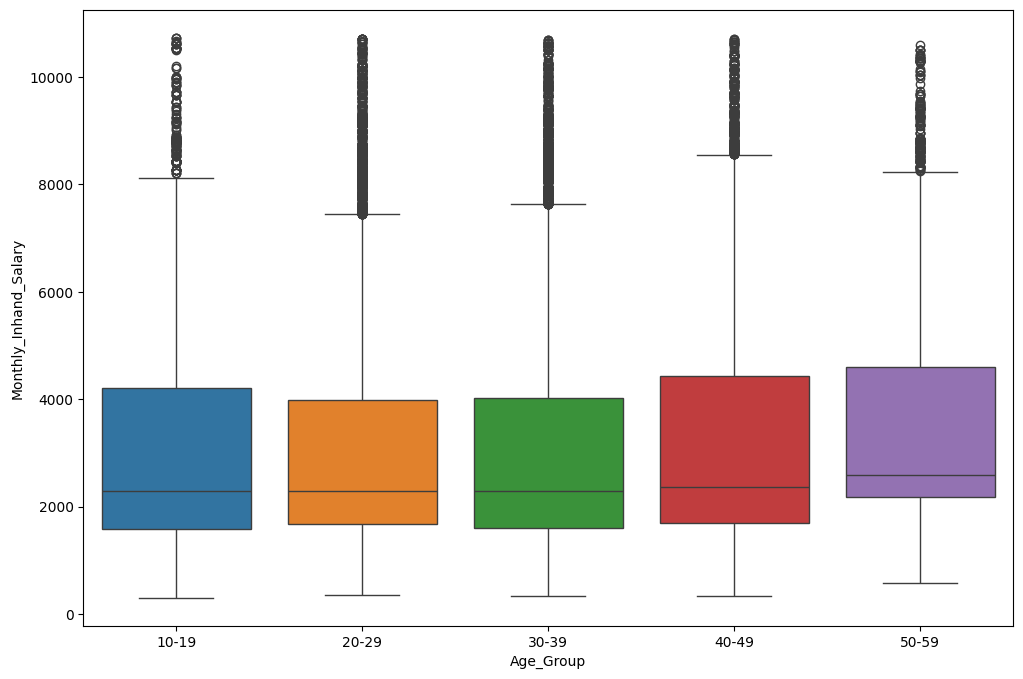

In [41]:
plt.figure(figsize = (12, 8))
sns.boxplot(x = Refined_Data_Set["Age_Group"], y = Refined_Data_Set["Monthly_Inhand_Salary"], hue = Refined_Data_Set["Age_Group"])

In [42]:
Refined_Data_Set.groupby("Age_Group")["Monthly_Inhand_Salary"].max().sort_values(ascending=False)

<ipython-input-42-89eb9786c928>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Refined_Data_Set.groupby("Age_Group")["Monthly_Inhand_Salary"].max().sort_values(ascending=False)


,Monthly_Inhand_Salary
Age_Group,
10-19,10731.2900
40-49,10709.9125
20-29,10705.2500
30-39,10696.4475
50-59,10596.8000


In [43]:
Refined_Data_Set.groupby("Age_Group")["Monthly_Inhand_Salary"].min().sort_values(ascending=True)

<ipython-input-43-ccffcd7311f1>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Refined_Data_Set.groupby("Age_Group")["Monthly_Inhand_Salary"].min().sort_values(ascending=True)


,Monthly_Inhand_Salary
Age_Group,
10-19,303.645417
30-39,332.431250
40-49,332.431250
20-29,358.058333
50-59,578.624153


In [44]:
Refined_Data_Set

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,...,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,New_Occupation,Age_Group
0,23.0,12,19114.12,1824.843333,3,4,3,4.0,128,3,...,26.822620,180,1,49.574949,80.415295,3,312.494089,Good,Scientist,20-29
1,23.0,12,19114.12,2295.058333,3,4,3,4.0,128,-1,...,31.944960,86,1,49.574949,118.280222,4,284.629162,Good,Scientist,20-29
3,23.0,12,19114.12,2295.058333,3,4,3,4.0,128,5,...,31.377862,185,1,49.574949,199.458074,6,223.451310,Good,Scientist,20-29
4,23.0,12,19114.12,1824.843333,3,4,3,4.0,128,6,...,24.797347,186,1,49.574949,41.420153,2,341.489231,Good,Scientist,20-29
5,23.0,12,19114.12,2295.058333,3,4,3,4.0,128,8,...,27.262259,187,1,49.574949,62.430172,0,340.479212,Good,Scientist,20-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98289,29.0,5,34599.94,2942.328333,7,6,3,0.0,3463,19,...,40.788342,237,1,0.000000,79.228156,3,475.004677,Standard,Entrepreneur,20-29
98295,29.0,5,34599.94,2942.328333,7,6,3,0.0,3463,22,...,33.128609,243,1,0.000000,165.397552,3,388.835282,Standard,Entrepreneur,20-29
98297,38.0,7,41015.55,2295.058333,0,4,4,1.0,4144,4,...,38.442034,86,1,25.671257,218.360354,3,331.264639,Standard,Lawyer,30-39
98299,38.0,7,41015.55,3152.962500,0,4,4,1.0,4144,9,...,31.936092,219,0,25.671257,387.541439,6,192.083554,Standard,Lawyer,30-39


In [45]:
Refined_Data_Set.groupby("New_Occupation")["Monthly_Inhand_Salary"].value_counts()

New_Occupation  Monthly_Inhand_Salary
Accountant      2295.058333              503
                1106.003333                8
                1978.269167                8
                3180.911667                8
                567.096250                 7
                                        ... 
Writer          9910.917500                1
                9970.420000                1
                10046.257500               1
                10140.453333               1
                10523.702500               1
Name: count, Length: 13179, dtype: int64

<Axes: xlabel='New_Occupation', ylabel='Monthly_Inhand_Salary'>

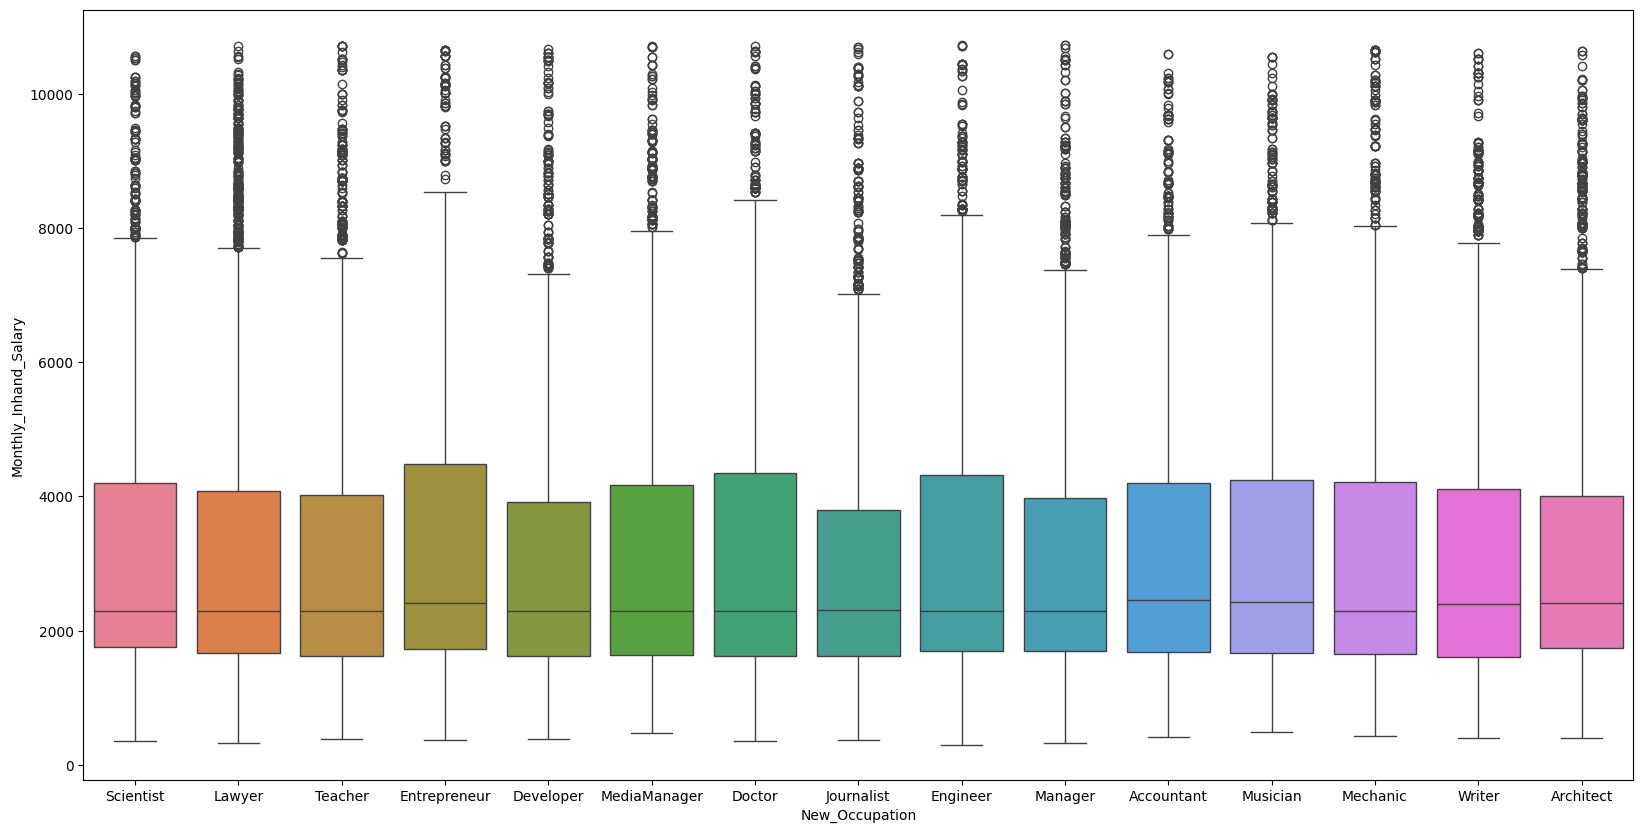

In [46]:
plt.figure(figsize = (20, 10))
sns.boxplot(x = Refined_Data_Set["New_Occupation"], y = Refined_Data_Set["Monthly_Inhand_Salary"], hue = Refined_Data_Set["New_Occupation"])

In [47]:
Refined_Data_Set.groupby("New_Occupation")["Monthly_Inhand_Salary"].max().sort_values(ascending=False)

,Monthly_Inhand_Salary
New_Occupation,
Manager,10731.290000
Engineer,10726.722500
Lawyer,10705.250000
Doctor,10704.182500
Teacher,10704.030000
MediaManager,10703.827500
Journalist,10693.556667
Developer,10668.353333
Mechanic,10653.867500


In [48]:
Refined_Data_Set.groupby("New_Occupation")["Monthly_Inhand_Salary"].min().sort_values(ascending=True)

,Monthly_Inhand_Salary
New_Occupation,
Engineer,303.645417
Lawyer,332.431250
Manager,333.596667
Scientist,355.208333
Doctor,358.058333
Journalist,373.071667
Entrepreneur,378.993333
Teacher,380.649167
Developer,391.053333


In [49]:
Refined_Data_Set.columns


Index(['Age', 'Occupation', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Type_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment',
       'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Credit_Mix',
       'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score', 'New_Occupation', 'Age_Group'],
      dtype='object')

In [50]:
max_salary = Refined_Data_Set[["Age", "New_Occupation", "Monthly_Inhand_Salary"]]
max_salary = max_salary.sort_values(by="Monthly_Inhand_Salary", ascending=False)
max_salary = max_salary.reset_index(drop=True)
max_salary.head(10)

,Age,New_Occupation,Monthly_Inhand_Salary
0,19.0,Manager,10731.2900
1,19.0,Manager,10731.2900
2,19.0,Engineer,10726.7225
3,46.0,Engineer,10709.9125
4,45.0,Engineer,10709.9125
5,25.0,Lawyer,10705.2500
6,21.0,Doctor,10704.1825
7,21.0,Teacher,10704.0300
8,21.0,Teacher,10704.0300
9,21.0,Teacher,10704.0300


<Axes: xlabel='Age', ylabel='Monthly_Inhand_Salary'>

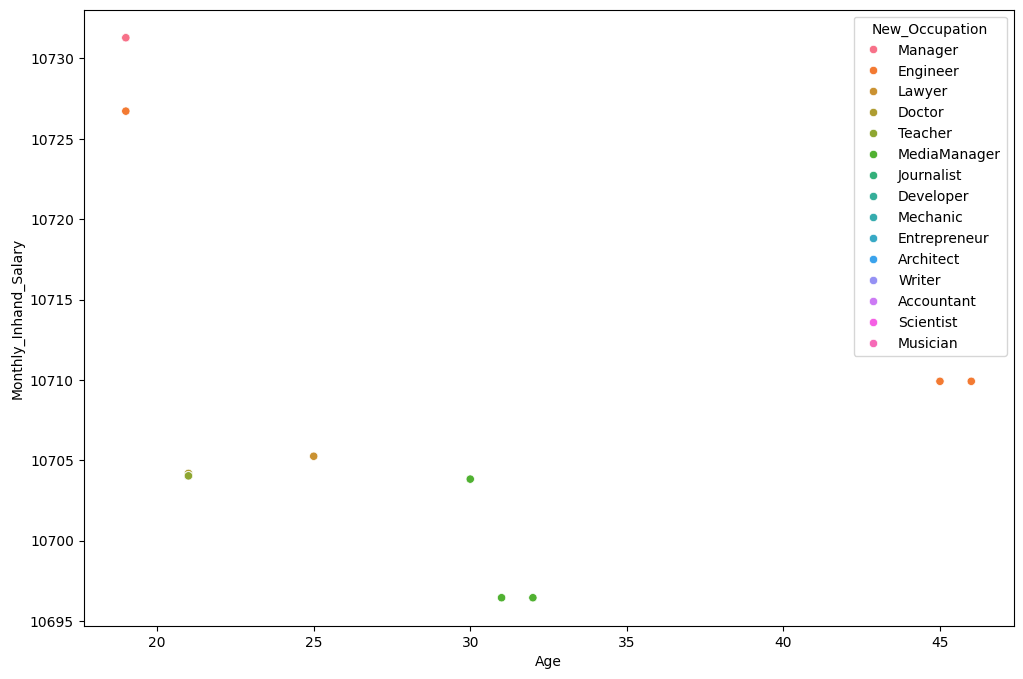

In [51]:
plt.figure(figsize = (12, 8))
sns.scatterplot(y = max_salary["Monthly_Inhand_Salary"].head(15), x = max_salary["Age"].head(25), hue = max_salary["New_Occupation"])

In [52]:
min_salary=max_salary

<Axes: xlabel='Age', ylabel='Monthly_Inhand_Salary'>

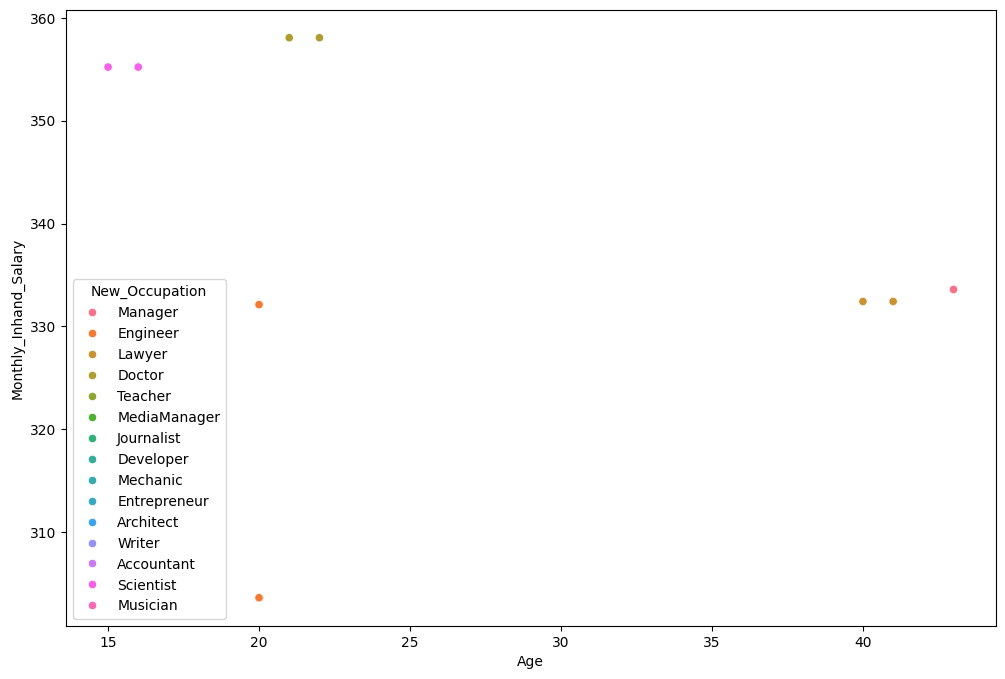

In [53]:
plt.figure(figsize = (12, 8))
sns.scatterplot(y = min_salary["Monthly_Inhand_Salary"].tail(25), x = min_salary["Age"].tail(25), hue = min_salary["New_Occupation"])

The following Python code uses the seaborn library to visualize, through a scatterplot, the distribution of 'Monthly_Inhand_Salary' values for the last 10 individuals with the smallest age in a DataFrame, categorized by their 'Occupation.' The Y-axis represents the 'Monthly_Inhand_Salary' column for individuals with the minimum age, while the X-axis represents their age values. Each point is color-coded based on their 'Occupation.' According to this plot, the individual with the minimum age and the occupation 'Manager' receives a salary of 10731.2900

### **Visualizing Numerical Columns**

The numerical columns in the dataset are analyzed to reveal their basic statistics. Minimum, maximum, mean, median, and mode values have been individually examined for each numerical column in the dataset. Furthermore, the distributions of numerical columns have been visualized through histograms to understand the general characteristics of the data. Boxplot analysis has been utilized to delve deeper into the central tendency and dispersion of numerical values. Lastly, graphical representations depicting the density of numerical columns provide a detailed analysis of focal points and distribution trends within the dataset.

In [54]:
def show_distribution(col,title):


    min_val = col.min()
    max_val = col.max()
    mean_val = col.mean()
    med_val = col.median()
    mod_val = col.mode()[0]

    print('Minimum:{:.2f}\nMean:{:.2f}\nMedian:{:.2f}\nMode:{:.2f}\nMaximum:{:.2f}\n'.format(min_val,
                                                                                            mean_val,
                                                                                            med_val,
                                                                                            mod_val,
                                                                                            max_val))


    fig, ax = plt.subplots(2, 1, figsize = (15,10))


    ax[0].hist(col)
    ax[0].set_ylabel('Values',fontsize=10)


    ax[0].axvline(x=min_val, color = 'gray', linestyle='dashed', linewidth = 2, label='Minimum')
    ax[0].axvline(x=mean_val, color = 'cyan', linestyle='dashed', linewidth = 2, label='Mean')
    ax[0].axvline(x=med_val, color = 'red', linestyle='dashed', linewidth = 2, label='Median')
    ax[0].axvline(x=mod_val, color = 'yellow', linestyle='dashed', linewidth = 2, label='Mode')
    ax[0].axvline(x=max_val, color = 'gray', linestyle='dashed', linewidth = 2, label='Maximum')
    ax[0].legend(loc='upper right')


    ax[1].boxplot(col, vert=False)
    ax[1].set_xlabel('value', fontsize=10)


    fig.suptitle(title, fontsize=15)

In [55]:
def show_density(col,baslik):
    from matplotlib import pyplot as plt

    fig = plt.figure(figsize=(15,5))


    col.plot.density()


    plt.title(baslik, fontsize=15)


    plt.axvline(x=col.mean(), color = 'cyan', linestyle='dashed', linewidth = 2, label = 'Mean')
    plt.axvline(x=col.median(), color = 'red', linestyle='dashed', linewidth = 2, label = 'Median')
    plt.axvline(x=col.mode()[0], color = 'yellow', linestyle='dashed', linewidth = 2, label = 'Mode')
    plt.legend()


    plt.show()

Minimum:14.00
Mean:33.36
Median:33.00
Mode:28.00
Maximum:56.00



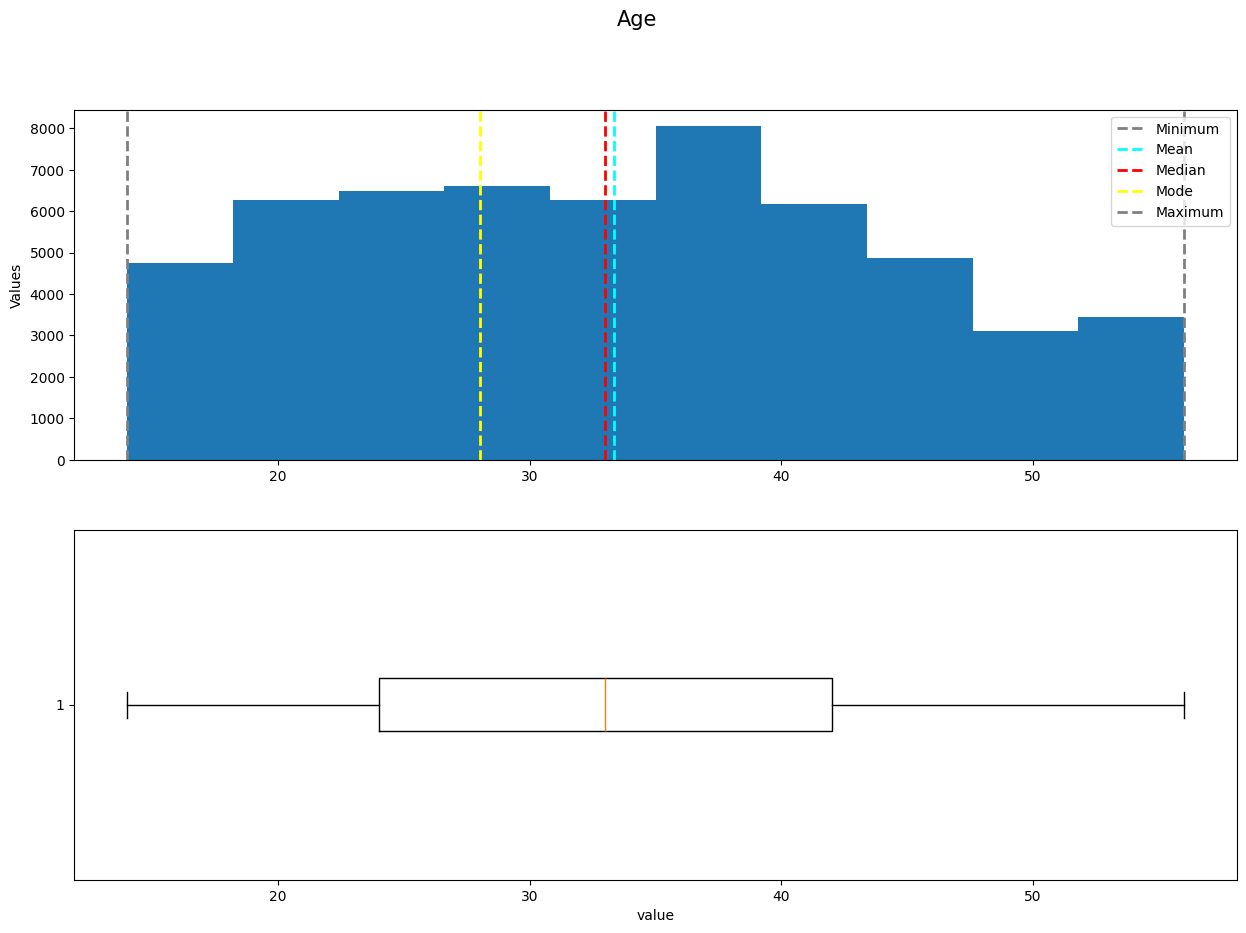

In [56]:
show_distribution(Refined_Data_Set['Age'],"Age")

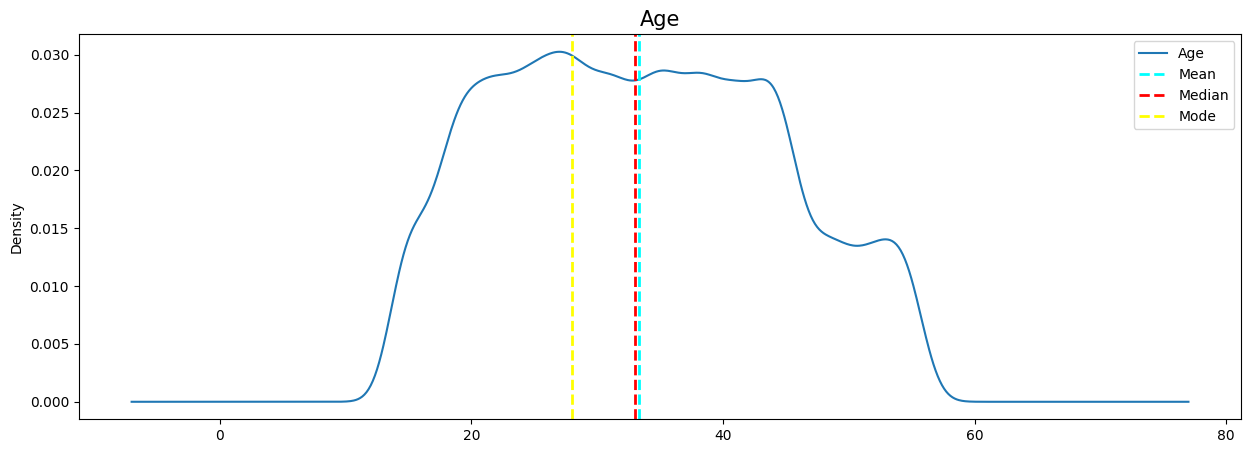

In [57]:
show_density(Refined_Data_Set['Age'],'Age')

Minimum:303.65
Mean:3155.87
Median:2300.37
Mode:2295.06
Maximum:10731.29



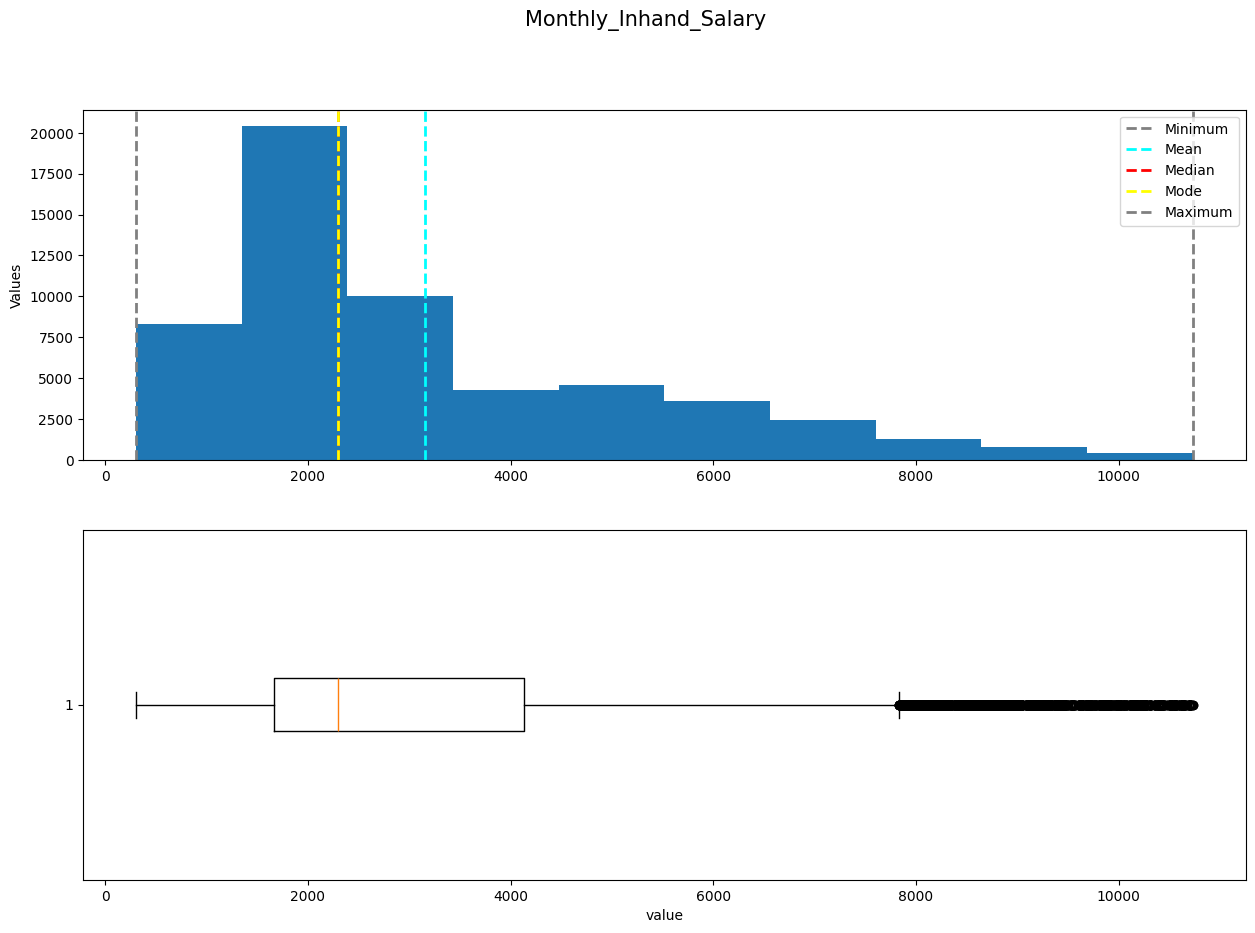

In [58]:
show_distribution(Refined_Data_Set['Monthly_Inhand_Salary'],"Monthly_Inhand_Salary")

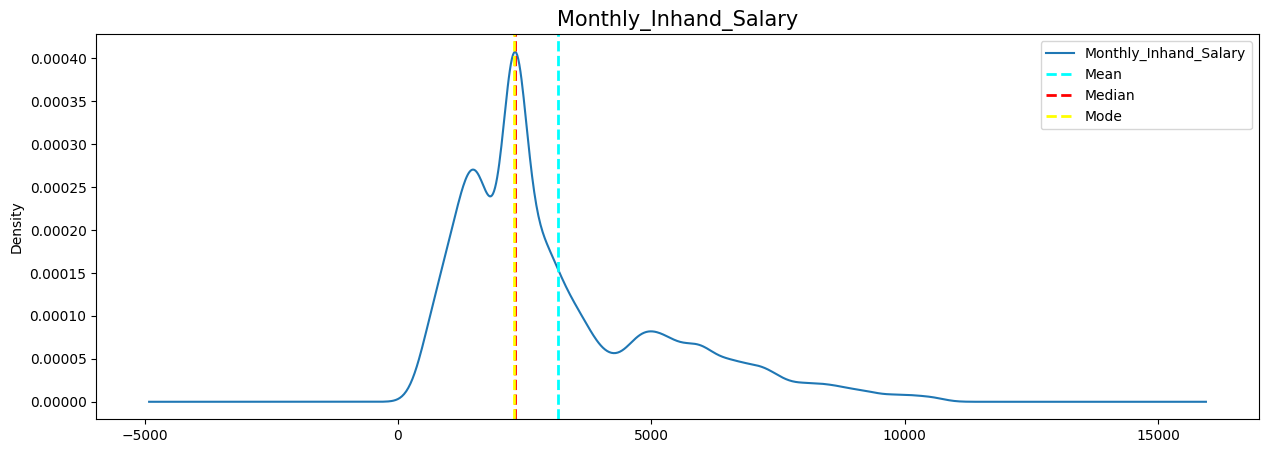

In [59]:

show_density(Refined_Data_Set['Monthly_Inhand_Salary'],"Monthly_Inhand_Salary")

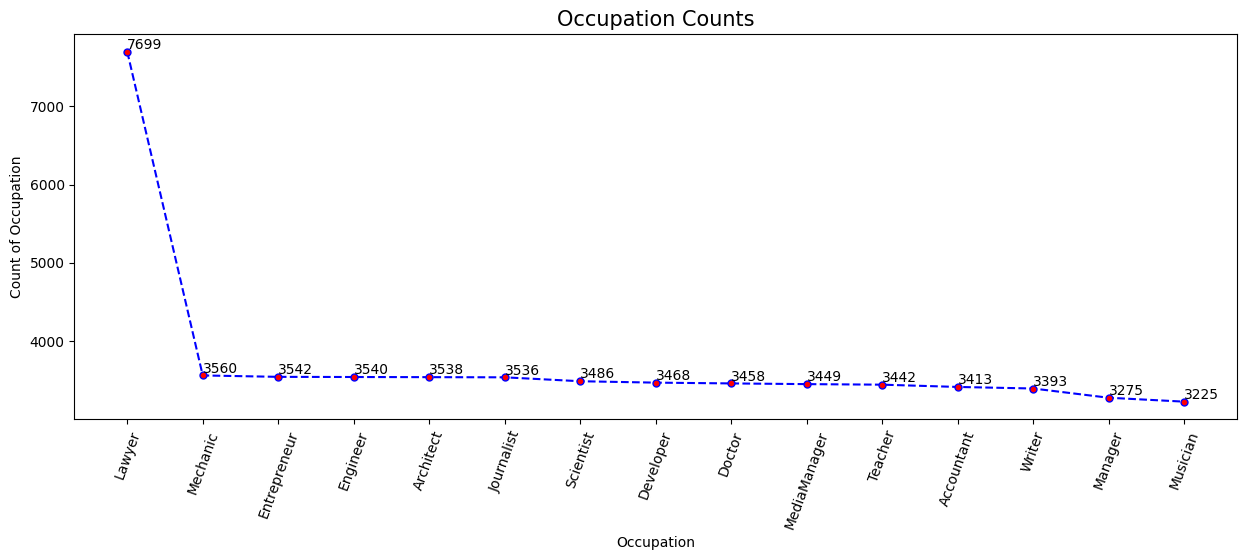

In [60]:
plt.figure(figsize=(15,5))
plt.plot(Refined_Data_Set['New_Occupation'].value_counts().index, Refined_Data_Set['New_Occupation'].value_counts().values,
         color='blue', linestyle='--', marker='o', markerfacecolor='red', markersize=5)
plt.title('Occupation Counts', fontsize=15)
plt.xlabel('Occupation')
plt.ylabel('Count of Occupation')
for index, value  in enumerate(Refined_Data_Set['New_Occupation'].value_counts().values):
    plt.text(index,value,str(value), va = 'bottom')
plt.xticks(rotation=70)
plt.show()

In [61]:
ratings = Refined_Data_Set.groupby("New_Occupation")[['Age','Monthly_Inhand_Salary']].mean()
ratings

,Age,Monthly_Inhand_Salary
New_Occupation,,
Accountant,33.712863,3154.216046
Architect,33.296778,3183.766201
Developer,33.324683,3066.791018
Doctor,33.303933,3156.928653
Engineer,32.476836,3190.080512
Entrepreneur,33.672219,3210.197140
Journalist,34.132919,3020.465060
Lawyer,33.552539,3137.749486
Manager,32.923969,3161.156439


In [62]:
Skills = Refined_Data_Set.groupby("New_Occupation")[['Monthly_Inhand_Salary','Amount_invested_monthly']].mean()
Skills

,Monthly_Inhand_Salary,Amount_invested_monthly
New_Occupation,,
Accountant,3154.216046,155.284316
Architect,3183.766201,154.834041
Developer,3066.791018,152.133044
Doctor,3156.928653,157.030119
Engineer,3190.080512,158.735280
Entrepreneur,3210.197140,161.838804
Journalist,3020.465060,152.666003
Lawyer,3137.749486,157.710272
Manager,3161.156439,159.668800


<Axes: xlabel='New_Occupation'>

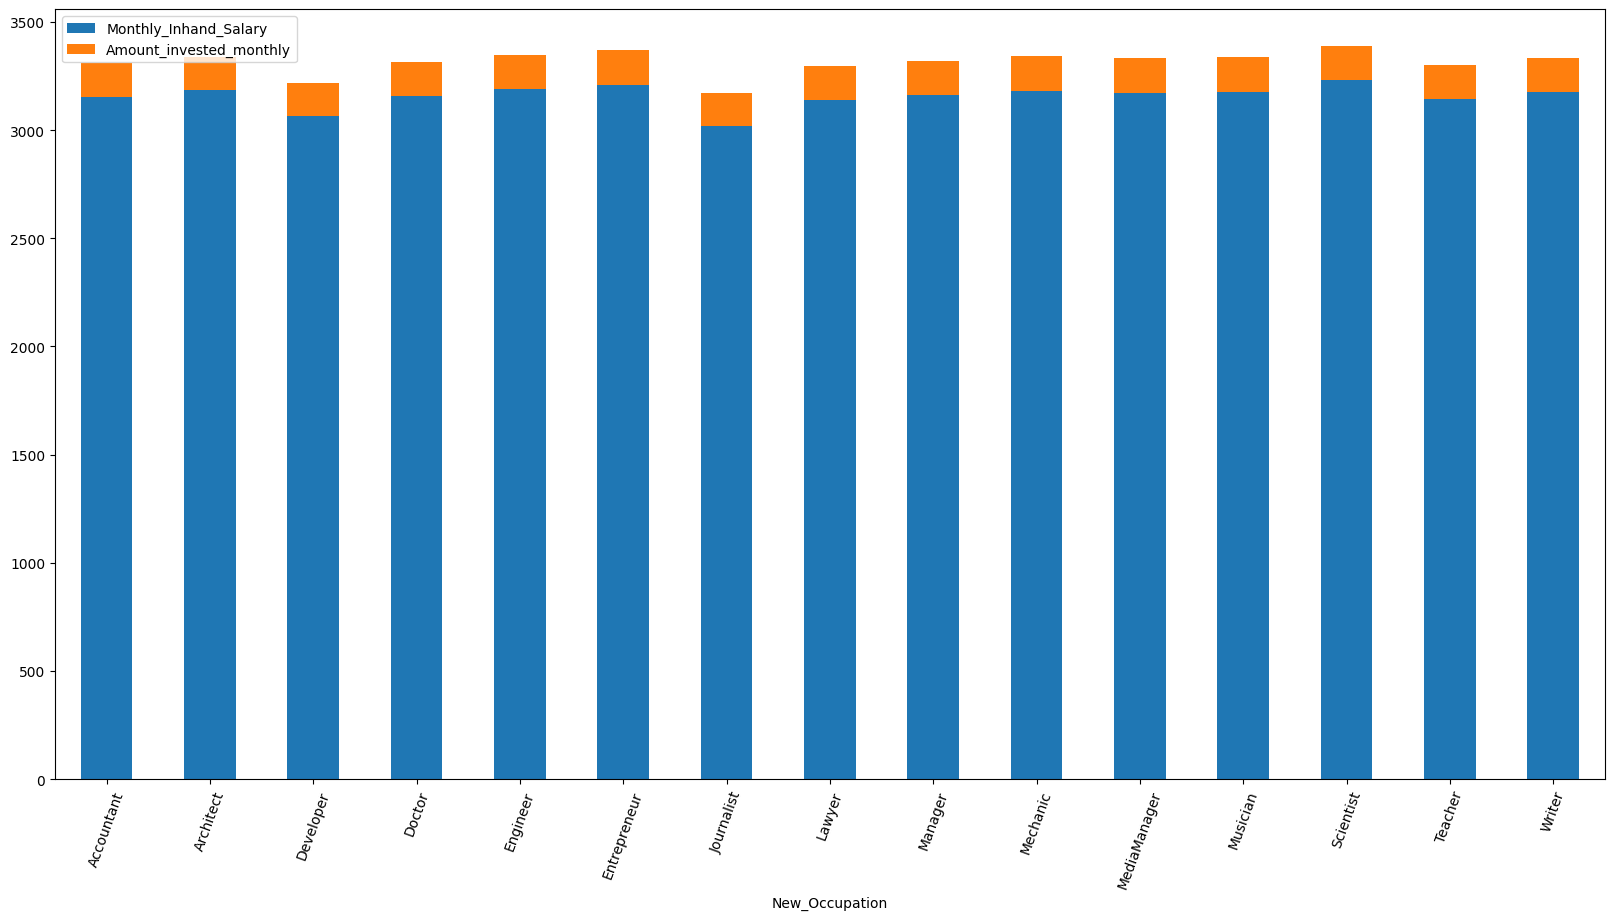

In [63]:
Skills.plot.bar(stacked=True, rot = 70, figsize=(20,10))

In [64]:
grouped_df = Refined_Data_Set.groupby('New_Occupation')
result_df = grouped_df[['Monthly_Inhand_Salary', 'Amount_invested_monthly']].mean()
result_df['Salary_to_Investment_Ratio'] = result_df['Monthly_Inhand_Salary'] / result_df['Amount_invested_monthly']
result_df = result_df.sort_values(by='Salary_to_Investment_Ratio', ascending=False)
result_df

,Monthly_Inhand_Salary,Amount_invested_monthly,Salary_to_Investment_Ratio
New_Occupation,,,
Architect,3183.766201,154.834041,20.562443
Accountant,3154.216046,155.284316,20.312522
Writer,3177.502129,156.711139,20.276173
Teacher,3143.985387,155.514085,20.216724
Scientist,3230.217095,159.831117,20.210189
Developer,3066.791018,152.133044,20.158612
Doctor,3156.928653,157.030119,20.103969
Engineer,3190.080512,158.735280,20.096859
Musician,3176.731871,159.038365,19.974626


In [65]:
result_df['Salary_to_Investment_Ratio'].mean()

20.052690579631317

In this code block, a Skills dataframe is created by grouping average values for Occupation, Monthly Net Salary, and Monthly Investment Amount based on restaurants in the DataFrame. Subsequently, a stacked bar chart is generated using the Skills dataframe. In the stacked bar chart, each occupation group's average values for each feature are represented stacked on top of each other. This enables the comparison of average values for different features across each occupation group. This code block visualizes average salary and investment data by occupation in a stacked bar chart, allowing for the comparison of different salary and investment amounts across occupations.

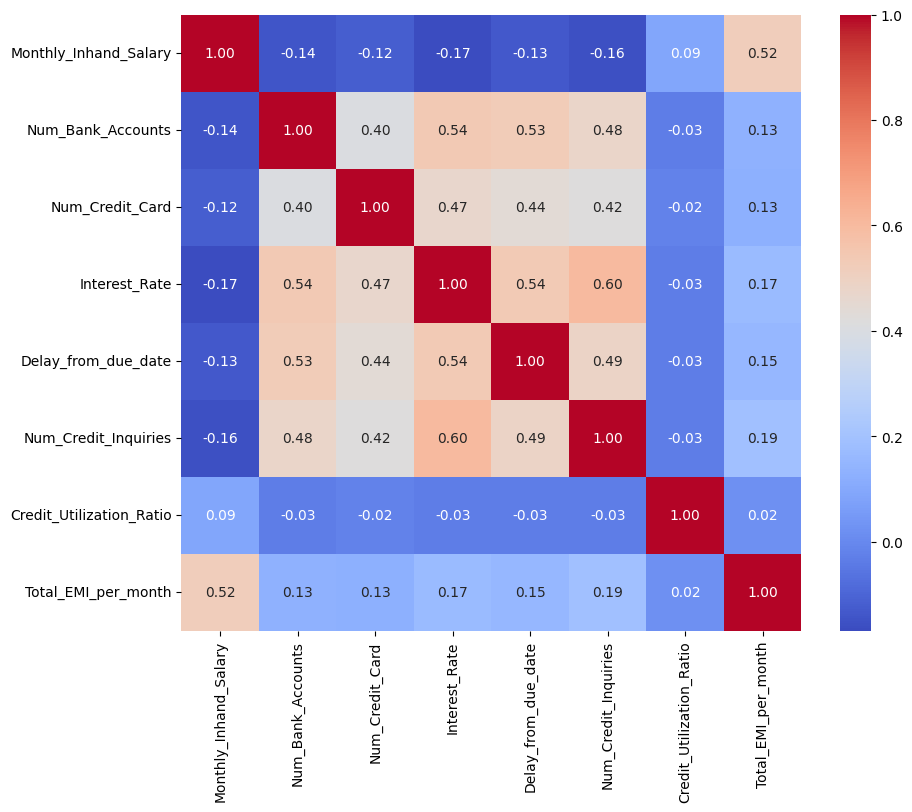

In [66]:
columns=Refined_Data_Set[["Monthly_Inhand_Salary","Num_Bank_Accounts","Num_Credit_Card","Interest_Rate","Delay_from_due_date","Num_Credit_Inquiries","Credit_Utilization_Ratio","Total_EMI_per_month"]]

correlation_matrix = columns.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

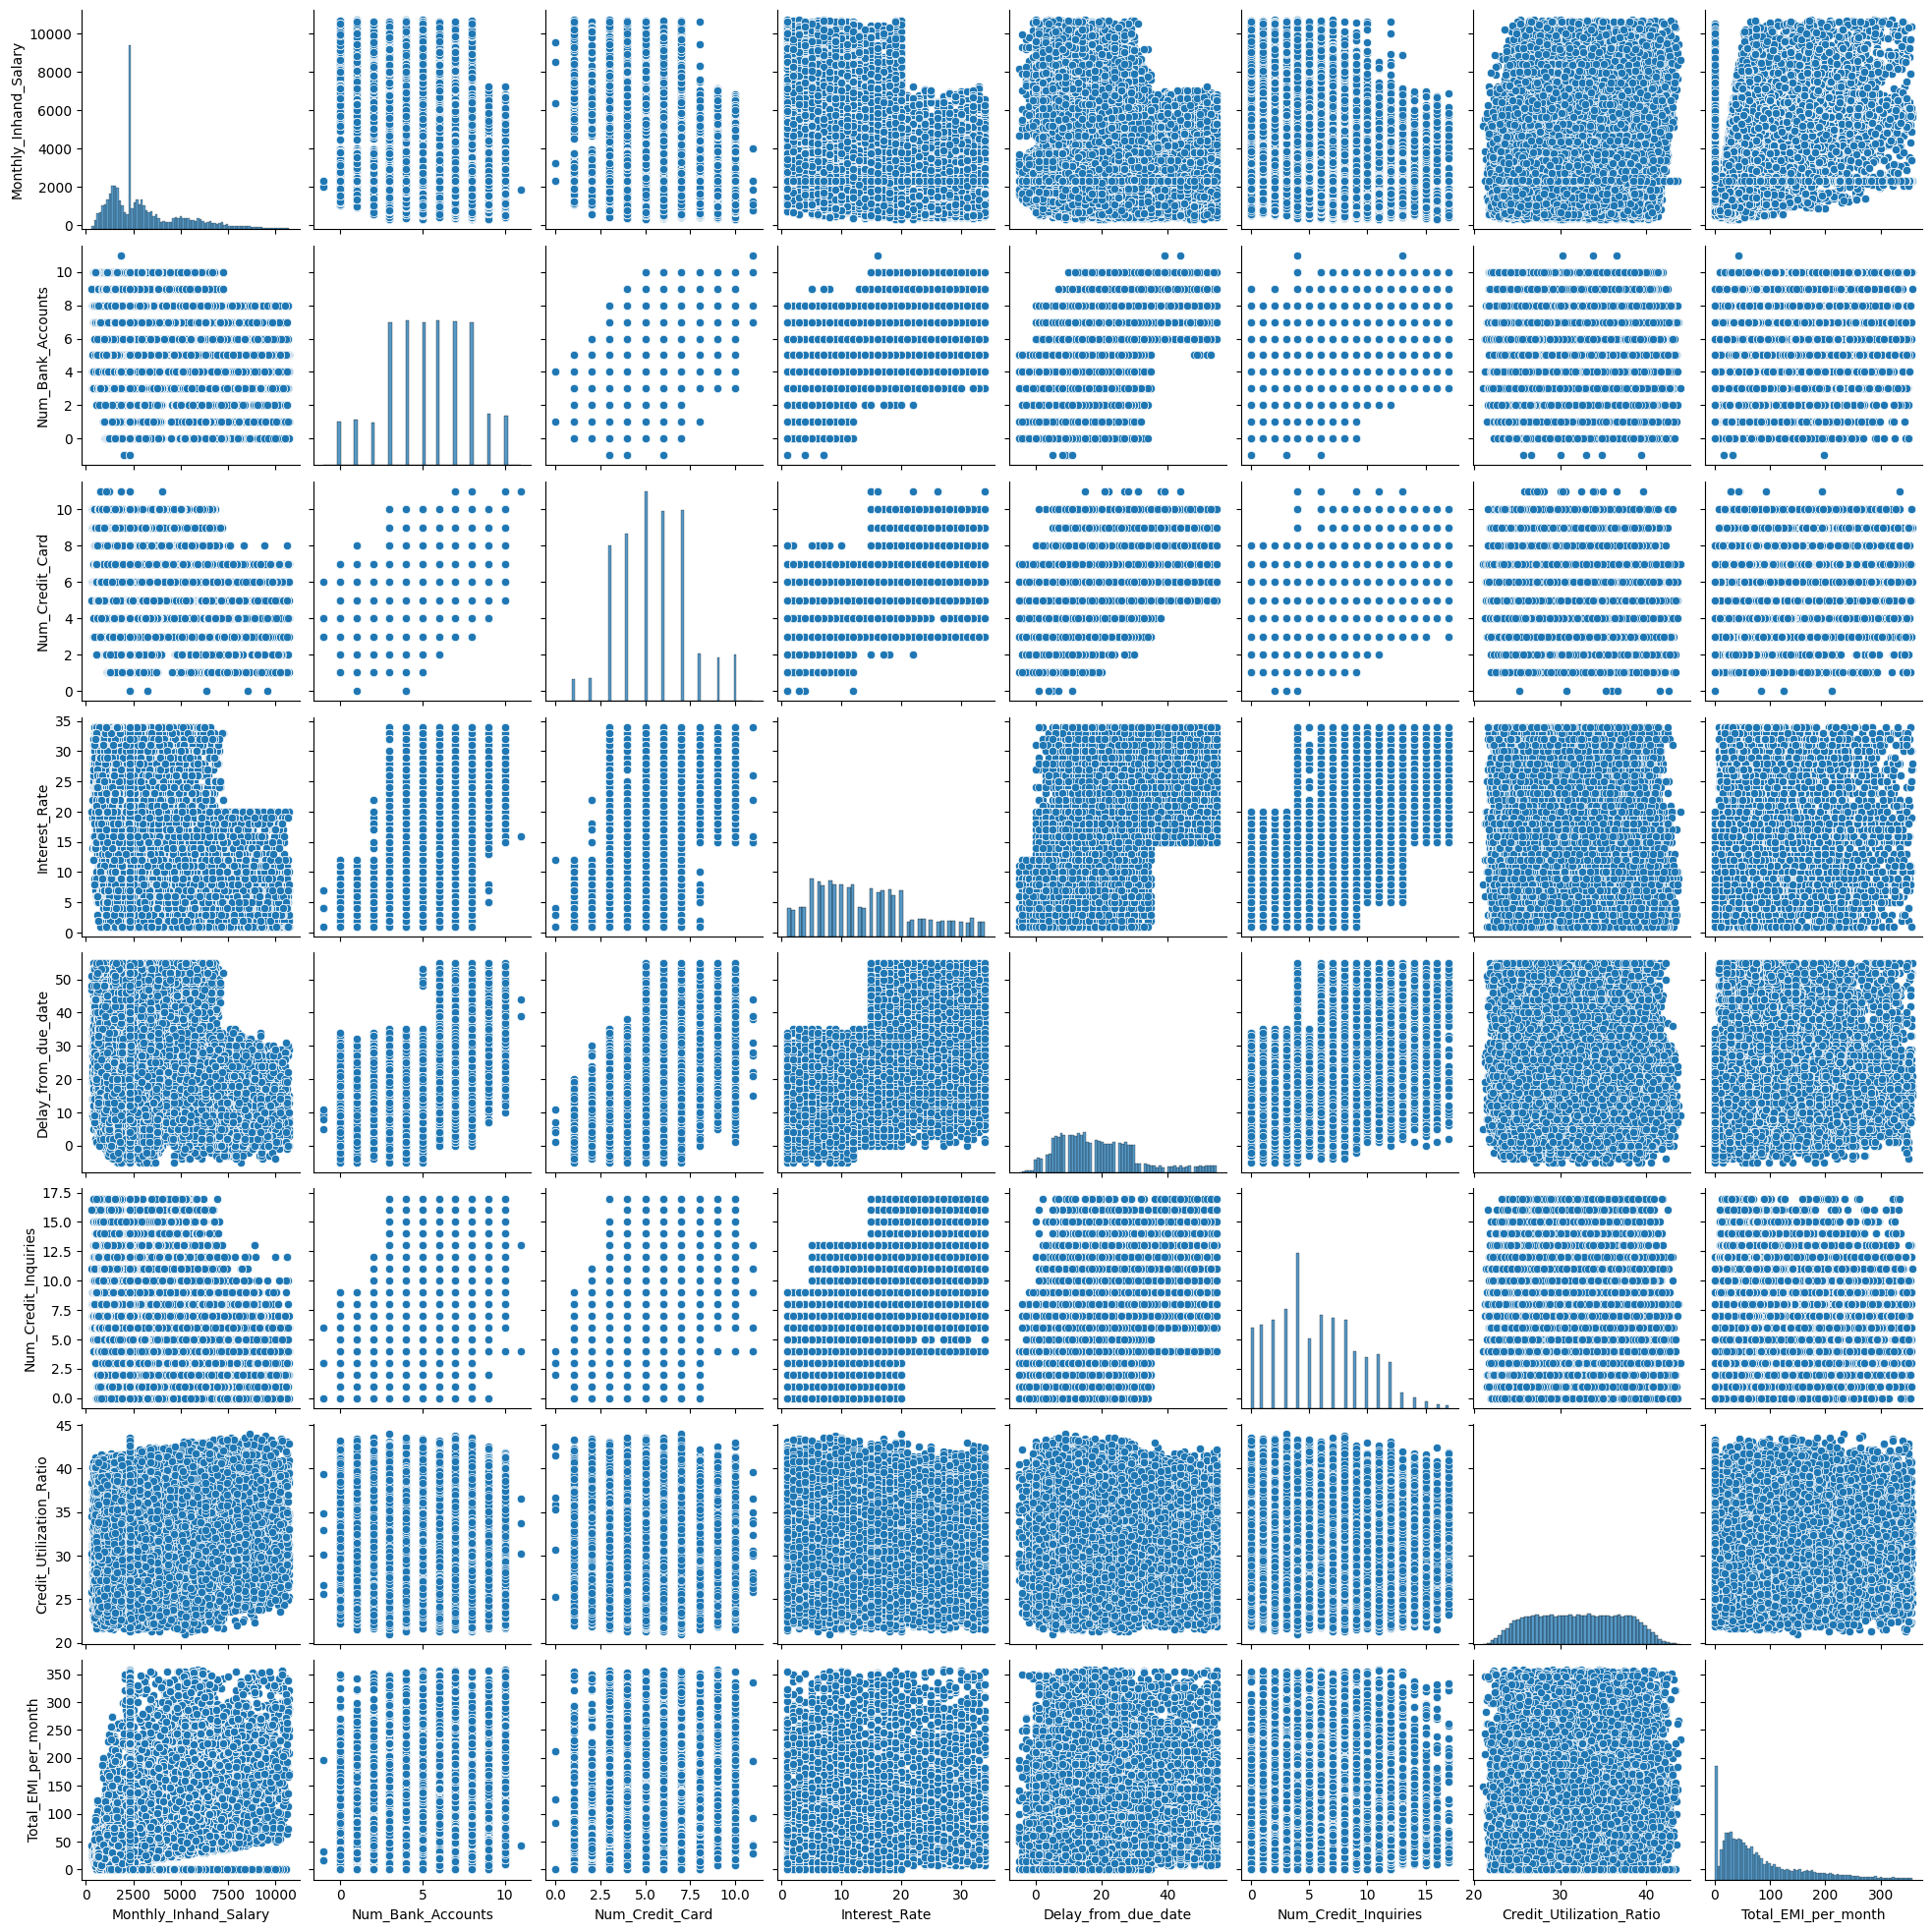

In [67]:
g = sns.pairplot(columns)

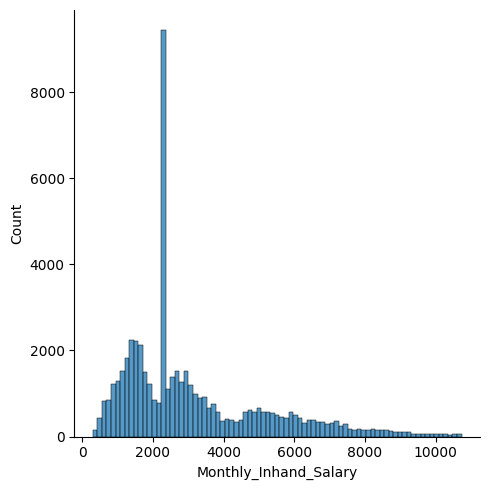

In [68]:
sns.displot(columns['Monthly_Inhand_Salary'])
plt.show()

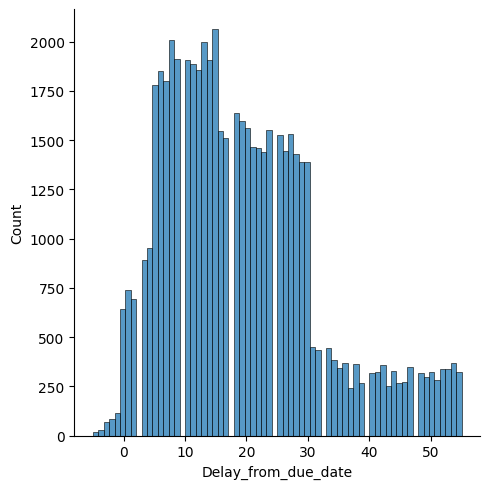

In [69]:
sns.displot(columns['Delay_from_due_date'])
plt.show()

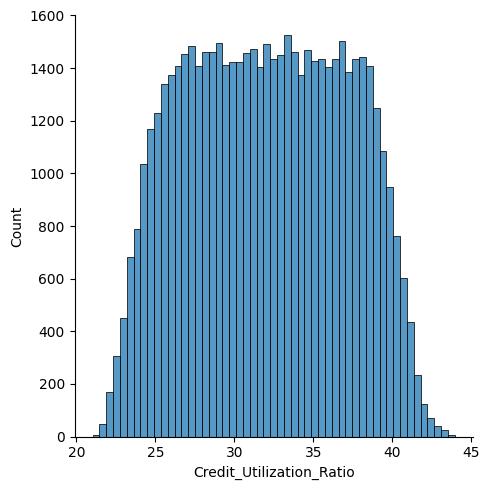

In [70]:
sns.displot(columns['Credit_Utilization_Ratio'])
plt.show()

In [71]:
Refined_Data_Set

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,...,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,New_Occupation,Age_Group
0,23.0,12,19114.12,1824.843333,3,4,3,4.0,128,3,...,26.822620,180,1,49.574949,80.415295,3,312.494089,Good,Scientist,20-29
1,23.0,12,19114.12,2295.058333,3,4,3,4.0,128,-1,...,31.944960,86,1,49.574949,118.280222,4,284.629162,Good,Scientist,20-29
3,23.0,12,19114.12,2295.058333,3,4,3,4.0,128,5,...,31.377862,185,1,49.574949,199.458074,6,223.451310,Good,Scientist,20-29
4,23.0,12,19114.12,1824.843333,3,4,3,4.0,128,6,...,24.797347,186,1,49.574949,41.420153,2,341.489231,Good,Scientist,20-29
5,23.0,12,19114.12,2295.058333,3,4,3,4.0,128,8,...,27.262259,187,1,49.574949,62.430172,0,340.479212,Good,Scientist,20-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98289,29.0,5,34599.94,2942.328333,7,6,3,0.0,3463,19,...,40.788342,237,1,0.000000,79.228156,3,475.004677,Standard,Entrepreneur,20-29
98295,29.0,5,34599.94,2942.328333,7,6,3,0.0,3463,22,...,33.128609,243,1,0.000000,165.397552,3,388.835282,Standard,Entrepreneur,20-29
98297,38.0,7,41015.55,2295.058333,0,4,4,1.0,4144,4,...,38.442034,86,1,25.671257,218.360354,3,331.264639,Standard,Lawyer,30-39
98299,38.0,7,41015.55,3152.962500,0,4,4,1.0,4144,9,...,31.936092,219,0,25.671257,387.541439,6,192.083554,Standard,Lawyer,30-39


### **Data Splitting**

In [72]:
y = Refined_Data_Set['Credit_Score']

X = Refined_Data_Set.drop(['Credit_Score','New_Occupation','Age_Group'], axis=1)

In [73]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### **Model Creation & Training & Testing**

In [74]:
rf_params = {
    'max_depth': None,
    'min_samples_split': 2,
    'n_estimators': 200
}

model_rf = RandomForestClassifier(**rf_params)

model_rf.fit(X_train, y_train)

y_pred = model_rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy}")

Model Accuracy: 0.8071396697902722


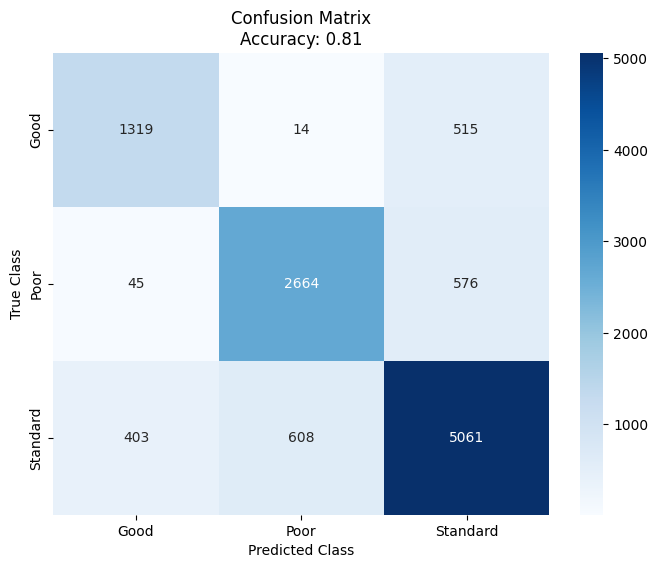

In [75]:
from sklearn.metrics import confusion_matrix

y_pred = model_rf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=model_rf.classes_, yticklabels=model_rf.classes_)
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.title(f"Confusion Matrix\nAccuracy: {accuracy:.2f}")
plt.show()

In [76]:
rounded_accuracy = round(accuracy, 2)

print("Model Accuracy (rounded):", "%", 100 * rounded_accuracy)

Model Accuracy (rounded): % 81.0


### **Result**

##### 1-)**Credit Usage and Age Groups:**
The age group that utilizes credit the most is between 20-29 years old.
The age group with the least credit usage is between 50-59 years old.
Individuals aged 30-39 are closely aligned with the 20-29 age group, which has the highest credit usage.
##### 2-)**Monthly Salary Income and Age Groups:**
Individuals aged 50-59 have the highest average monthly salary income.
The person with the highest monthly salary belongs to the 10-19 age group.
The lowest monthly salary earners are also in the 10-19 age group.
##### 3-)**Occupational Groups and Salaries:**
According to the evaluation based on monthly salaries, the highest-paid occupational group is "Manager," while the lowest-paid group is "Engineer."
##### 4-)**Occupational Distribution of Credit Users:**
The majority of credit users belong to the "Lawyer" occupational group.
##### 5-)**Occupational Groups and Credit Payment Rates:**
Individuals in the "Architect" occupational group allocate 20.56% of their salaries to credit payments.
Those in the "Media Manager" occupational group allocate 19.67% of their salaries to credit payments.
##### 6-)**Overall Credit Payment Rate:**
On average, individuals allocate 20.05% of their salaries to credit repayments.

### **Recommendations**

##### **1-)Risk Assessment and Age Groups:**
Given that individuals in the 20-29 age group utilize credit the most, a more careful risk assessment can be conducted for credit products targeting this age group. Examining the income and payment histories of individuals in this age group in more detail can assist in effective risk management.

##### **2-)Special Credit Products and Occupational Groups:**
The majority of the "Lawyer" occupational group suggests an opportunity to offer special credit products or benefits tailored to this profession. Credit products designed specifically for occupational groups can positively impact payment performance.

##### **3-)Income and Credit Limit Relationship:**
By evaluating the relationship between monthly salary income and credit limits, suitable credit limits can be determined based on individuals' incomes. This can reduce the risk of excessive borrowing and enhance payment capacity.

##### **4-)Special Solutions for Low-Income Groups:**
Establishing special support programs or low-interest credit options for individuals in the 10-19 age group with low incomes can help them combat financial challenges.

##### **5-)Salary and Occupational Group Balancing:**
Assessing the salary disparity between the "Manager" and "Engineer" occupational groups is crucial. Adopting a balanced approach in determining credit limits and payment plans is essential.

##### **6-)Credit Payment Rates and Budget Planning:**
Considering the credit payment rates in the "Architect" and "Media Manager" occupational groups, providing individuals with credit payment plans that align with their incomes can strengthen financial budget planning.